In [1]:
import pandas as pd
import os

print("--- Analyzing Provided Datasets ---")

# Access the content of Dataset Descriptions.txt
try:
    with open('/content/Dataset Descriptions.txt', 'r') as f:
        dataset_descriptions = f.read()
    print("\n--- Content of Dataset Descriptions.txt ---")
    print(dataset_descriptions)
except FileNotFoundError:
    print("ERROR: 'Dataset Descriptions.txt' not found. Please ensure it's uploaded.")
    exit()
except Exception as e:
    print(f"ERROR: Could not read 'Dataset Descriptions.txt': {e}")
    exit()

# Optional: Inspect metadata.json if it's general metadata
try:
    import json
    with open('/content/metadata.json', 'r') as f:
        general_metadata = json.load(f)
    print("\n--- Content of metadata.json (partial) ---")
    # Print only a summary as JSON can be very large
    for key, value in general_metadata.items():
        if isinstance(value, (dict, list)) and len(repr(value)) > 200: # Limit print for large objects
            print(f"{key}: (Summary: {type(value)}, {len(value)} items/keys)")
        else:
            print(f"{key}: {value}")
except FileNotFoundError:
    print("WARNING: 'metadata.json' not found. Skipping general metadata analysis.")
except Exception as e:
    print(f"ERROR: Could not read 'metadata.json': {e}")


print("\n--- Initial Dataset Analysis Complete. Waiting for review. ---")

--- Analyzing Provided Datasets ---

--- Content of Dataset Descriptions.txt ---
# 🌌 NASA Space Weather Events Dataset

## 📋 Overview

This comprehensive dataset contains space weather events collected from NASA's DONKI (Database of Notifications, Knowledge, Information) API. It includes detailed information about solar flares, coronal mass ejections (CMEs), geomagnetic storms, and high-speed solar wind streams that occurred over the past 2 years.

**Space weather** directly impacts Earth's technological infrastructure including GPS systems, satellite communications, and power grids. This dataset enables researchers to analyze these effects and develop predictive models for future space weather events.

## 🗂️ File Structure

### `space_weather_unified.csv` - Main Dataset (Recommended)
Contains all space weather events in a unified format. **This is the primary file you'll want to use.**

**Key Columns:**
- `event_id`: Unique event identifier
- `event_type`: Event category (Solar Flare,

**Data Acquisition & Understanding 📊**

In [2]:
import pandas as pd
import os # For checking directory contents if file not found
import warnings

# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

print("--- Starting NASA Space Weather Data Analysis Project (Focus: Solar Flares) ---")
print("\n--- Step 1: Data Acquisition & Understanding ---")

# IMPORTANT: Adjust this path to where your CSV file is located.
# We are now focusing on 'solar_flares.csv'
csv_file_path = '/content/solar_flares.csv'

try:
    df_solar_flares = pd.read_csv(csv_file_path)
    print(f"\nDataset loaded successfully from: {csv_file_path}")
except FileNotFoundError:
    print(f"ERROR: File not found at '{csv_file_path}'. Please ensure the file is uploaded to Colab's /content/ directory or the path is correct.")
    print("Checking /content/ directory for files:")
    try:
        print(os.listdir('/content/'))
    except Exception as e_list:
        print(f"Could not list directory /content/: {e_list}")
    exit()
except Exception as e:
    print(f"ERROR: An unexpected error occurred during data loading in Step 1: {e}")
    exit()

print("\n--- Initial Data Overview (df_solar_flares.head()) ---")
print(df_solar_flares.head())

print("\n--- DataFrame Information (df_solar_flares.info()) ---")
df_solar_flares.info()

print("\n--- Descriptive Statistics (df_solar_flares.describe(include='all')) ---")
print(df_solar_flares.describe(include='all')) # include='all' to see categorical summaries too

print("\n--- Check for Missing Values (df_solar_flares.isnull().sum()) ---")
initial_nulls = df_solar_flares.isnull().sum()
print(initial_nulls[initial_nulls > 0]) # Print only columns with NaNs

print("\n--- Check Unique Values for Target and Key Categorical Columns ---")
# 'class_type' is our main target. Also check others.
key_categorical_cols = ['event_type', 'class_type', 'source_location', 'instruments']
for col in key_categorical_cols:
    if col in df_solar_flares.columns:
        print(f"\n--- Value Counts for '{col}' ---")
        print(df_solar_flares[col].value_counts())
    else:
        print(f"Column '{col}' not found. Skipping value counts for it.")

print("\n--- Step 1: Data Acquisition & Understanding Complete ---")

--- Starting NASA Space Weather Data Analysis Project (Focus: Solar Flares) ---

--- Step 1: Data Acquisition & Understanding ---

Dataset loaded successfully from: /content/solar_flares.csv

--- Initial Data Overview (df_solar_flares.head()) ---
                      event_id   event_type         begin_time  \
0  2023-07-11T14:19:00-FLR-001  Solar Flare  2023-07-11T14:19Z   
1  2023-07-11T16:02:00-FLR-001  Solar Flare  2023-07-11T16:02Z   
2  2023-07-11T16:25:00-FLR-001  Solar Flare  2023-07-11T16:25Z   
3  2023-07-11T17:51:00-FLR-001  Solar Flare  2023-07-11T17:51Z   
4  2023-07-11T19:20:00-FLR-001  Solar Flare  2023-07-11T19:20Z   

           peak_time           end_time class_type source_location  \
0  2023-07-11T14:35Z  2023-07-11T14:45Z       M2.0          N25E90   
1  2023-07-11T16:12Z  2023-07-11T16:25Z       M1.1          N25E89   
2  2023-07-11T16:27Z  2023-07-11T16:30Z       M1.0          N25E89   
3  2023-07-11T18:08Z  2023-07-11T18:16Z       M6.8          N25E88   
4  202

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split # Needed for full block execution
from sklearn.linear_model import LogisticRegression # Needed for full block execution
from sklearn.ensemble import RandomForestClassifier # Needed for full block execution
from sklearn.metrics import ( # Needed for full block execution
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
import lightgbm as lgb # Needed for full block execution
import os
import warnings
import re # For cleaning feature names

warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

print("--- Starting Step 2: Data Cleaning & Preprocessing for Solar Flare Project (Refined) ---")

# --- RE-LOAD DATASET (for clean start) ---
csv_file_path = '/content/solar_flares.csv'
try:
    df_solar_flares = pd.read_csv(csv_file_path)
    print(f"\nDataset loaded successfully from: {csv_file_path}")
except FileNotFoundError:
    print(f"ERROR: File not found at '{csv_file_path}'. Please check path.")
    exit()
except Exception as e:
    print(f"ERROR: An error occurred during dataset reload: {e}")
    exit()

df_clean = df_solar_flares.copy()

# Step 2.1: Drop Irrelevant & High-Cardinality Columns
columns_to_drop = [
    'event_id', 'event_type', 'note', 'source_location' # New drops based on EDA
]
df_clean.drop(columns=columns_to_drop, errors='ignore', inplace=True)
print(f"\nColumns dropped: {columns_to_drop}.")
print(f"DataFrame shape after dropping irrelevant/high-cardinality columns: {df_clean.shape}")
print(df_clean.head())


# Step 2.2: Convert Datetime Columns and Engineer Features
datetime_cols = ['begin_time', 'peak_time', 'end_time']
for col in datetime_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', utc=True)
        if df_clean[col].isnull().any():
            print(f"WARNING: Some values in '{col}' could not be converted to datetime and became NaT (NaN).")
        print(f"Column '{col}' converted to datetime.")

# Calculate duration of event (only if begin_time and end_time are valid)
if 'begin_time' in df_clean.columns and 'end_time' in df_clean.columns:
    df_clean['event_duration_minutes'] = (df_clean['end_time'] - df_clean['begin_time']).dt.total_seconds() / 60
    print("\n'event_duration_minutes' calculated.")
else:
    print("\nCould not calculate 'event_duration_minutes' (missing begin_time or end_time).")

print(df_clean.head())


# Step 2.3: Handle Remaining Missing Values (after datetime conversion and duration calculation)
# Missing values were in 'active_region' (47) and NaNs from datetime coerce/duration calc (144 each).
print("\nChecking for missing values after datetime conversions:")
current_nulls_after_dt = df_clean.isnull().sum()
cols_with_nulls_final = current_nulls_after_dt[current_nulls_after_dt > 0]
print(cols_with_nulls_final)

if not cols_with_nulls_final.empty:
    print("\nDropping rows with any remaining NaNs for simplicity.")
    initial_rows = df_clean.shape[0]
    df_clean.dropna(inplace=True)
    print(f"Dropped {initial_rows - df_clean.shape[0]} rows due to remaining NaNs.")
else:
    print("No missing values found in the DataFrame.")

print(f"DataFrame shape after dropping rows with NaNs: {df_clean.shape}")
print(df_clean.head())


# Step 2.4: Encode the Target Variable ('class_type') and Filter Rare Classes
if 'class_type' in df_clean.columns:
    df_clean['main_class'] = df_clean['class_type'].astype(str).str.extract(r'([A-Z])').iloc[:, 0]

    # Define a standard order for solar flare classes (A is weakest, X is strongest)
    class_order = ['A', 'B', 'C', 'M', 'X']

    # Count occurrences of each class in the main_class column
    main_class_counts = df_clean['main_class'].value_counts()

    # Filter to keep only classes that exist and have at least 2 samples for stratification
    classes_to_keep = main_class_counts[main_class_counts >= 2].index.tolist()

    # Ensure they are in the correct order as per class_order
    final_classes_for_encoding = [c for c in class_order if c in classes_to_keep]

    initial_rows_before_class_filter = df_clean.shape[0]
    df_clean = df_clean[df_clean['main_class'].isin(final_classes_for_encoding)].copy()

    if df_clean.shape[0] < initial_rows_before_class_filter:
        print(f"\nDropped {initial_rows_before_class_filter - df_clean.shape[0]} rows due to 'main_class' being too rare (less than 2 samples) or not in {class_order}.")
        print(f"Kept classes for encoding: {final_classes_for_encoding}")

    # Use OrdinalEncoder to convert main_class to numerical values
    oe_class = OrdinalEncoder(categories=[final_classes_for_encoding]) # No unknown_value needed as we filtered
    df_clean['class_type_Encoded'] = oe_class.fit_transform(df_clean[['main_class']])

    print(f"\n'main_class' extracted and encoded. Order: {oe_class.categories_[0]} -> {np.arange(len(oe_class.categories_[0]))}")
    print(f"Encoded Class Type Value Counts:\n{df_clean['class_type_Encoded'].value_counts()}")
    print(df_clean[['class_type', 'main_class', 'class_type_Encoded']].head())
else:
    print("'class_type' column not found. Skipping encoding.")


# Step 2.5: Separate Features (X) and Target (y)
y = df_clean['class_type_Encoded'].astype(int) # Ensure target is int

# Features X will be all remaining columns except original class_type, main_class, and original datetime columns
features_to_exclude_from_X = [
    'class_type', 'main_class', # Original class forms
    'begin_time', 'peak_time', 'end_time', # Original datetime objects
    'class_type_Encoded' # *** IMPORTANT: EXCLUDE THE ENCODED TARGET FROM FEATURES X ***
]
X = df_clean.drop(columns=features_to_exclude_from_X, errors='ignore')

print(f"\nRaw Features (X) shape before final encoding/scaling: {X.shape}")
print(f"Target (y) shape: {y.shape}")


# Step 2.6: Identify Numerical and Categorical Features for X (from the remaining X columns)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nIdentified Numerical Features for Scaling: {numerical_features}")
print(f"Identified Categorical Features for One-Hot Encoding: {categorical_features}")


# Step 2.7: Apply One-Hot Encoding to remaining Categorical Features (for X)
df_encoded_cats = pd.DataFrame(index=X.index) # Initialize empty
if categorical_features:
    df_encoded_cats = pd.get_dummies(X[categorical_features], columns=categorical_features, drop_first=True, dtype=int)
    print(f"\nCategorical features One-Hot Encoded. New encoded shape: {df_encoded_cats.shape}")
    print(df_encoded_cats.head())
else:
    print("\nNo categorical features to One-Hot Encode.")


# Step 2.8: Feature Scaling (for numerical features in X)
numerical_features_after_cat_handling = X.select_dtypes(include=np.number).columns.tolist()
df_scaled_nums = pd.DataFrame(index=X.index) # Initialize empty
if numerical_features_after_cat_handling:
    scaler = StandardScaler()
    df_scaled_nums = pd.DataFrame(scaler.fit_transform(X[numerical_features_after_cat_handling]), columns=numerical_features_after_cat_handling, index=X.index)
    print("\nNumerical features scaled using StandardScaler.")
    print(df_scaled_nums.head())
else:
    print("\nNo numerical features to scale.")


# Step 2.9: Combine all Processed Features (X)
X_processed = pd.concat([df_scaled_nums, df_encoded_cats], axis=1)

# Sanitize column names for LightGBM/other models: replace problematic characters
X_processed.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_processed.columns]
X_processed.columns = [re.sub(r'_{2,}', '_', col) for col in X_processed.columns] # Replace multiple underscores
X_processed.columns = [col.strip('_') for col in X_processed.columns] # Remove leading/trailing underscores
print("\nSanitized column names for LightGBM/Models:")
print(X_processed.columns.tolist())


print(f"\nFinal processed Features (X_processed) shape: {X_processed.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"First few rows of processed features:\n{X_processed.head()}")

print("\n--- Step 2: Data Cleaning & Preprocessing Complete ---")

--- Starting Step 2: Data Cleaning & Preprocessing for Solar Flare Project (Refined) ---

Dataset loaded successfully from: /content/solar_flares.csv

Columns dropped: ['event_id', 'event_type', 'note', 'source_location'].
DataFrame shape after dropping irrelevant/high-cardinality columns: (1599, 6)
          begin_time          peak_time           end_time class_type  \
0  2023-07-11T14:19Z  2023-07-11T14:35Z  2023-07-11T14:45Z       M2.0   
1  2023-07-11T16:02Z  2023-07-11T16:12Z  2023-07-11T16:25Z       M1.1   
2  2023-07-11T16:25Z  2023-07-11T16:27Z  2023-07-11T16:30Z       M1.0   
3  2023-07-11T17:51Z  2023-07-11T18:08Z  2023-07-11T18:16Z       M6.8   
4  2023-07-11T19:20Z  2023-07-11T19:29Z  2023-07-11T19:39Z       M1.0   

   active_region           instruments  
0        13379.0  GOES-P: EXIS 1.0-8.0  
1        13372.0  GOES-P: EXIS 1.0-8.0  
2        13372.0  GOES-P: EXIS 1.0-8.0  
3        13372.0  GOES-P: EXIS 1.0-8.0  
4        13372.0  GOES-P: EXIS 1.0-8.0  
Column 'begin_

**Exploratory Data Analysis (EDA) 🔍**


--- Starting Step 3: Exploratory Data Analysis (EDA) ---

--- Corrected Step 1 & 2 Execution Complete for EDA ---

--- Starting Step 3: Exploratory Data Analysis (EDA) ---


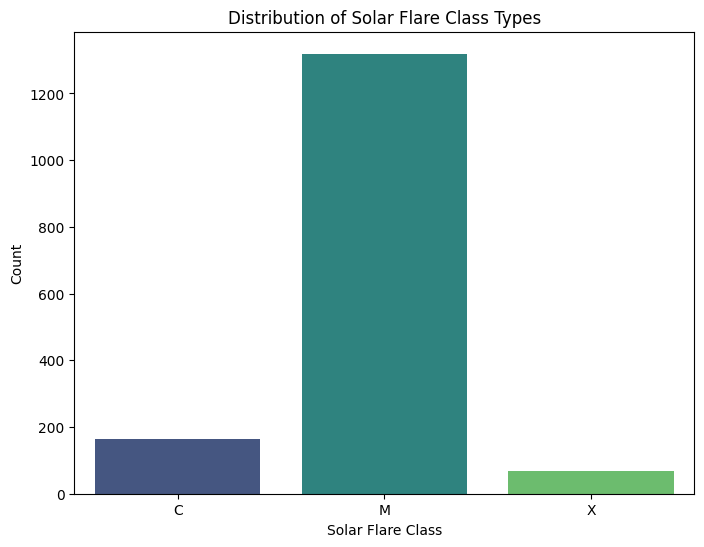

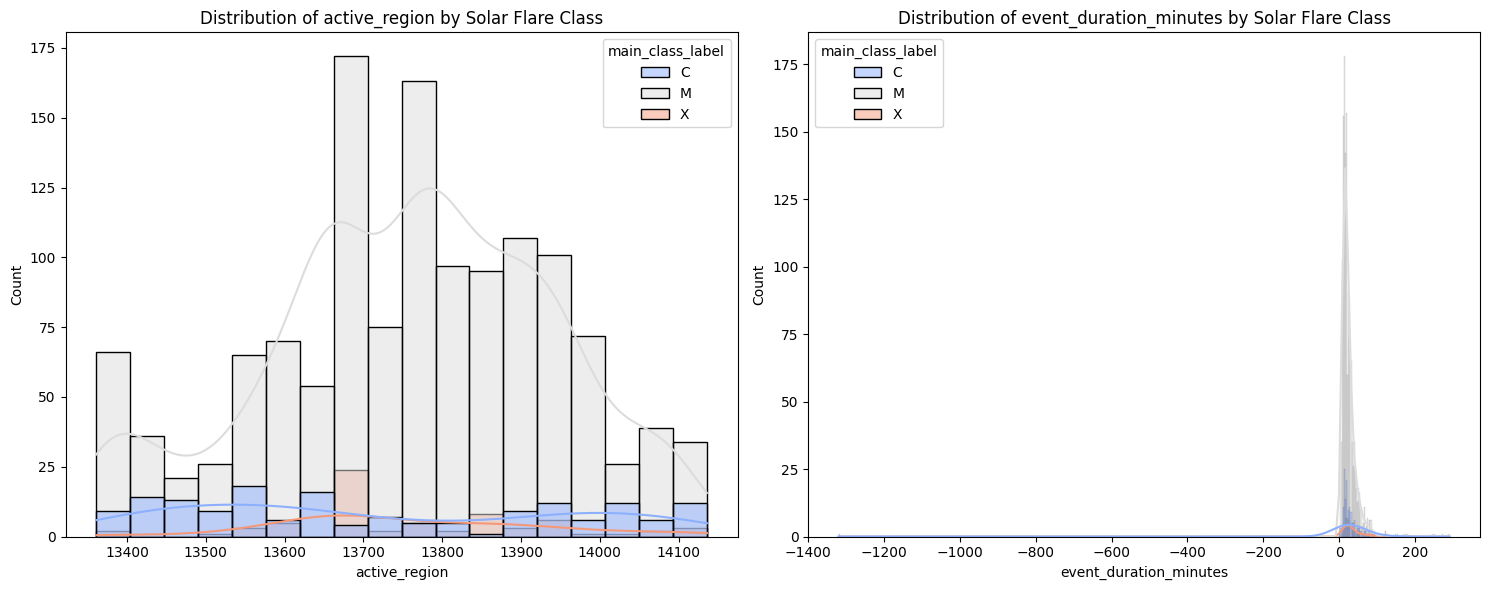

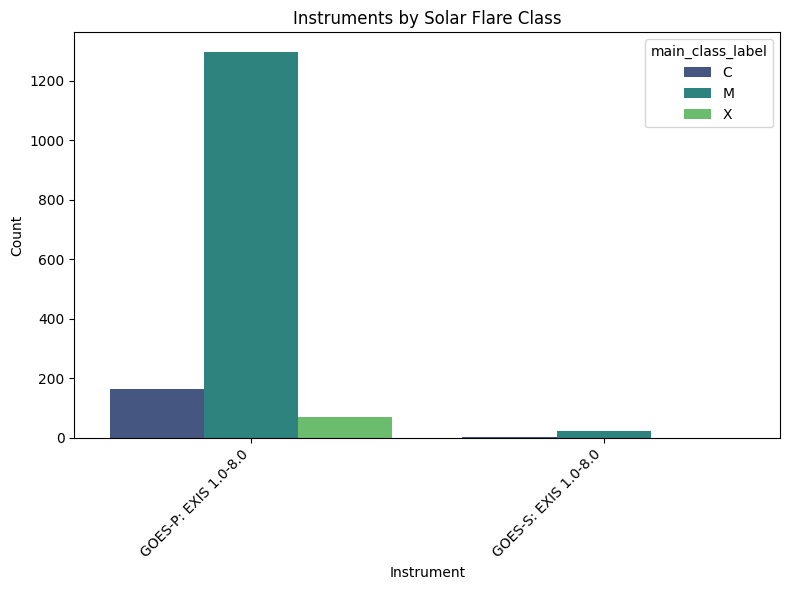

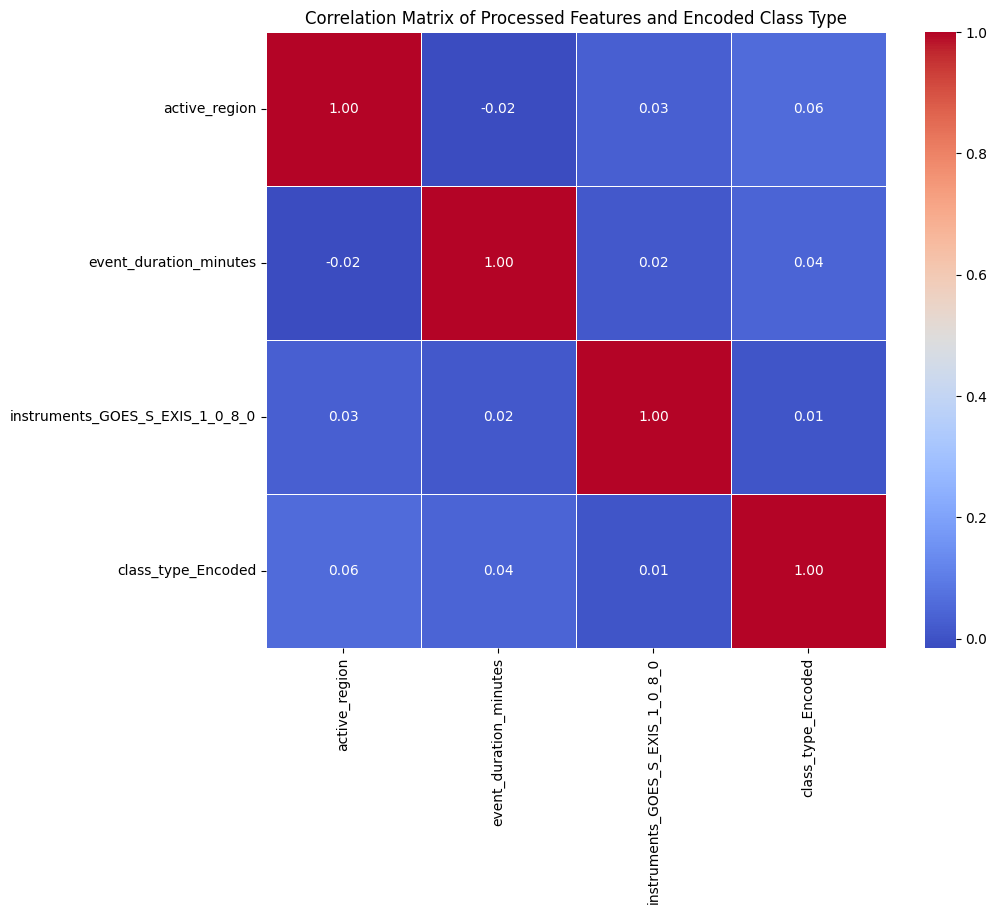


--- Step 3: EDA Complete ---


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import os
import warnings
import re # For cleaning feature names

warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

print("\n--- Starting Step 3: Exploratory Data Analysis (EDA) ---")

# --- RE-EXECUTE CORRECTED STEPS 1 & 2 TO ENSURE X_PROCESSED and y are available ---
# This block is self-contained and ensures X_processed and y are correctly defined.

csv_file_path = '/content/solar_flares.csv'
try:
    df_space_weather = pd.read_csv(csv_file_path)
    df_clean = df_space_weather.copy()

    # Step 2.1: Drop Irrelevant & High-Cardinality Columns
    columns_to_drop = [
        'event_id', 'event_type', 'note', 'source_location'
    ]
    df_clean.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # Step 2.2: Convert Datetime Columns and Engineer Features
    datetime_cols = ['begin_time', 'peak_time', 'end_time']
    for col in datetime_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', utc=True)

    if 'begin_time' in df_clean.columns and 'end_time' in df_clean.columns:
        df_clean['event_duration_minutes'] = (df_clean['end_time'] - df_clean['begin_time']).dt.total_seconds() / 60

    # Step 2.3: Handle Remaining Missing Values
    df_clean.dropna(inplace=True)

    # Step 2.4: Encode the Target Variable ('class_type') and Filter Rare Classes
    if 'class_type' in df_clean.columns:
        df_clean['main_class'] = df_clean['class_type'].astype(str).str.extract(r'([A-Z])').iloc[:, 0]
        class_order = ['A', 'B', 'C', 'M', 'X']

        main_class_counts = df_clean['main_class'].value_counts()
        classes_to_keep = main_class_counts[main_class_counts >= 2].index.tolist()
        final_classes_for_encoding = [c for c in class_order if c in classes_to_keep]

        initial_rows_before_class_filter = df_clean.shape[0]
        df_clean = df_clean[df_clean['main_class'].isin(final_classes_for_encoding)].copy()

        oe_class = OrdinalEncoder(categories=[final_classes_for_encoding])
        df_clean['class_type_Encoded'] = oe_class.fit_transform(df_clean[['main_class']])

    # Step 2.5: Separate Features (X) and Target (y)
    y = df_clean['class_type_Encoded'].astype(int)

    features_to_exclude_from_X = [
        'class_type', 'main_class',
        'begin_time', 'peak_time', 'end_time',
        'class_type_Encoded'
    ]
    X = df_clean.drop(columns=features_to_exclude_from_X, errors='ignore')

    # Step 2.6: Identify Numerical and Categorical Features for X
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Step 2.7: Apply One-Hot Encoding to remaining Categorical Features (for X)
    df_encoded_cats = pd.DataFrame(index=X.index)
    if categorical_features:
        categorical_features_to_ohe = categorical_features # all are low cardinality
        df_encoded_cats = pd.get_dummies(X[categorical_features_to_ohe], columns=categorical_features_to_ohe, drop_first=True, dtype=int)

    # Step 2.8: Feature Scaling (for numerical features in X)
    numerical_features_after_cat_handling = X.select_dtypes(include=np.number).columns.tolist()
    df_scaled_nums = pd.DataFrame(index=X.index)
    if numerical_features_after_cat_handling:
        scaler = StandardScaler()
        df_scaled_nums = pd.DataFrame(scaler.fit_transform(X[numerical_features_after_cat_handling]), columns=numerical_features_after_cat_handling, index=X.index)

    # Step 2.9: Combine all Processed Features (X)
    X_processed = pd.concat([df_scaled_nums, df_encoded_cats], axis=1)

    X_processed.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_processed.columns]
    X_processed.columns = [re.sub(r'_{2,}', '_', col) for col in X_processed.columns]
    X_processed.columns = [col.strip('_') for col in X_processed.columns]

    print("\n--- Corrected Step 1 & 2 Execution Complete for EDA ---")

except FileNotFoundError:
    print(f"ERROR: Dataset not found at '{csv_file_path}'. Please check the path and upload status.")
    exit()
except Exception as e:
    print(f"ERROR: An error occurred during the re-execution of previous steps for EDA: {e}")
    print("Please ensure your dataset is correctly formatted and all columns expected by the code exist.")
    exit()


# --- Step 3: Exploratory Data Analysis (EDA) ---

# Re-map encoded target for better plot labels in EDA
# Use the `oe_class` object from encoding step to map back original class names
# The `final_classes_for_encoding` variable holds the correct order of classes kept.
class_map_reverse_for_plot = {i: label for i, label in enumerate(final_classes_for_encoding)}
df_clean['main_class_label'] = df_clean['class_type_Encoded'].map(class_map_reverse_for_plot)

print("\n--- Starting Step 3: Exploratory Data Analysis (EDA) ---")

# Step 3.1: Target Class Distribution (Imbalance Check)
plt.figure(figsize=(8, 6))
sns.countplot(x='main_class_label', data=df_clean, order=final_classes_for_encoding, palette='viridis')
plt.title('Distribution of Solar Flare Class Types')
plt.xlabel('Solar Flare Class')
plt.ylabel('Count')
plt.show()
#

# Step 3.2: Numerical Feature Distributions by Class
# Features: 'active_region', 'event_duration_minutes'
features_for_dist_by_class = ['active_region', 'event_duration_minutes']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(features_for_dist_by_class):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data=df_clean, x=feature, hue='main_class_label', kde=True, palette='coolwarm',
                 hue_order=final_classes_for_encoding)
    plt.title(f'Distribution of {feature} by Solar Flare Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()
#


# Step 3.3: Categorical Feature Distribution by Class
# Feature: 'instruments' (event_type was constant, source_location was dropped)
# 'instruments' was one-hot encoded, but we can plot its original distribution vs. class here.
if 'instruments' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_clean, x='instruments', hue='main_class_label',
                  order=df_clean['instruments'].value_counts().index,
                  hue_order=final_classes_for_encoding,
                  palette='viridis')
    plt.title('Instruments by Solar Flare Class')
    plt.xlabel('Instrument')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    #
else:
    print("\nNo suitable original categorical features found for distribution by class.")


# Step 3.4: Correlation Matrix
# Combine X_processed with the encoded target 'y'
df_corr_eda = X_processed.copy()
df_corr_eda['class_type_Encoded'] = y

plt.figure(figsize=(10, 8))
correlation_matrix = df_corr_eda.corr()
# Focus on correlations with the target variable
target_correlations = correlation_matrix['class_type_Encoded'].sort_values(ascending=False)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Processed Features and Encoded Class Type')
plt.show()
#

print("\n--- Step 3: EDA Complete ---")

**Model Selection & Training 🧠**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
import lightgbm as lgb
import os
import warnings
import re

warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

print("--- Starting Step 4: Model Selection & Training ---")

# --- RE-EXECUTE CORRECTED STEPS 1, 2 & 3 TO ENSURE X_PROCESSED and y are available ---
# This block is self-contained to ensure all necessary variables are correctly defined.

csv_file_path = '/content/solar_flares.csv'
try:
    df_space_weather = pd.read_csv(csv_file_path)
    df_clean = df_space_weather.copy()

    # Step 2.1: Drop Irrelevant & High-Cardinality Columns
    columns_to_drop = [
        'event_id', 'event_type', 'note', 'source_location'
    ]
    df_clean.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # Step 2.2: Convert Datetime Columns and Engineer Features
    datetime_cols = ['begin_time', 'peak_time', 'end_time']
    for col in datetime_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', utc=True)

    if 'begin_time' in df_clean.columns and 'end_time' in df_clean.columns:
        df_clean['event_duration_minutes'] = (df_clean['end_time'] - df_clean['begin_time']).dt.total_seconds() / 60

    # Step 2.3: Handle Remaining Missing Values
    df_clean.dropna(inplace=True)

    # Step 2.4: Encode the Target Variable ('class_type') and Filter Rare Classes
    if 'class_type' in df_clean.columns:
        df_clean['main_class'] = df_clean['class_type'].astype(str).str.extract(r'([A-Z])').iloc[:, 0]
        class_order = ['A', 'B', 'C', 'M', 'X']

        main_class_counts = df_clean['main_class'].value_counts()
        classes_to_keep = main_class_counts[main_class_counts >= 2].index.tolist()
        final_classes_for_encoding = [c for c in class_order if c in classes_to_keep]

        initial_rows_before_class_filter = df_clean.shape[0]
        df_clean = df_clean[df_clean['main_class'].isin(final_classes_for_encoding)].copy()

        oe_class = OrdinalEncoder(categories=[final_classes_for_encoding])
        df_clean['class_type_Encoded'] = oe_class.fit_transform(df_clean[['main_class']])

    # Step 2.5: Separate Features (X) and Target (y)
    y = df_clean['class_type_Encoded'].astype(int)

    features_to_exclude_from_X = [
        'class_type', 'main_class',
        'begin_time', 'peak_time', 'end_time',
        'class_type_Encoded'
    ]
    X = df_clean.drop(columns=features_to_exclude_from_X, errors='ignore')

    # Step 2.6: Identify Numerical and Categorical Features for X
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Step 2.7: Apply One-Hot Encoding to remaining Categorical Features (for X)
    df_encoded_cats = pd.DataFrame(index=X.index)
    if categorical_features:
        categorical_features_to_ohe = categorical_features
        df_encoded_cats = pd.get_dummies(X[categorical_features_to_ohe], columns=categorical_features_to_ohe, drop_first=True, dtype=int)

    # Step 2.8: Feature Scaling (for numerical features in X)
    numerical_features_after_cat_handling = X.select_dtypes(include=np.number).columns.tolist()
    df_scaled_nums = pd.DataFrame(index=X.index)
    if numerical_features_after_cat_handling:
        scaler = StandardScaler()
        df_scaled_nums = pd.DataFrame(scaler.fit_transform(X[numerical_features_after_cat_handling]), columns=numerical_features_after_cat_handling, index=X.index)

    # Step 2.9: Combine all Processed Features (X)
    X_processed = pd.concat([df_scaled_nums, df_encoded_cats], axis=1)

    X_processed.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_processed.columns]
    X_processed.columns = [re.sub(r'_{2,}', '_', col) for col in X_processed.columns]
    X_processed.columns = [col.strip('_') for col in X_processed.columns]

    print("\n--- Corrected Step 1 & 2 Execution Complete for Model Training ---")

except FileNotFoundError:
    print(f"ERROR: Dataset not found at '{csv_file_path}'. Please check the path and upload status.")
    exit()
except Exception as e:
    print(f"ERROR: An error occurred during the re-execution of previous steps for Step 4: {e}")
    print("Please ensure your dataset is correctly formatted and all columns expected by the code exist.")
    exit()


# --- Step 4.1: Train-Test Split (Stratified for imbalance) ---
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData split into training and testing sets (stratified).")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")


# --- Step 4.2 & 4.3: Model Selection & Training ---
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', multi_class='auto'),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "LightGBM Classifier": lgb.LGBMClassifier(random_state=42)
}

trained_models = {}
predictions = {}
probabilities = {} # For ROC AUC, though multi-class ROC AUC is more complex to plot

print("\n--- Training Models ---")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    predictions[name] = model.predict(X_test)

    # Try to get probabilities for ROC AUC, handling multi-class appropriately
    if hasattr(model, "predict_proba"):
        probabilities[name] = model.predict_proba(X_test)
    else: # Fallback for models without predict_proba
        probabilities[name] = None # Will cause ROC AUC to fail for this model if no proba

    print(f"{name} Trained.")


# --- Step 4.4: Model Evaluation ---
print("\n--- Model Evaluation ---")

# To get original class names for the report
# Using the `oe_class` object from encoding step to map back
class_labels_original = oe_class.categories_[0] # This will be ['C', 'M', 'X']

# Filter class labels to only those present in y_test (and thus in y_train) for report
unique_encoded_classes_in_y_test = np.unique(y_test)
target_names_for_report = [class_labels_original[c] for c in unique_encoded_classes_in_y_test]

for name, y_pred in predictions.items():
    print(f"\n--- {name} ---")

    # Accuracy (overall performance)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report (Precision, Recall, F1-score per class)
    # zero_division=0 ensures metrics for classes with no true samples in test set don't cause errors
    report = classification_report(y_test, y_pred, labels=unique_encoded_classes_in_y_test, target_names=target_names_for_report, zero_division=0)
    print("Classification Report:\n", report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # ROC AUC Score (multi-class: 'ovr' for one-vs-rest or 'ovo' for one-vs-one)
    # Average can be 'macro', 'weighted' etc. 'weighted' accounts for class imbalance.
    # Check if probabilities are valid for multi-class ROC AUC
    if probabilities[name] is not None and probabilities[name].shape[1] == len(unique_encoded_classes_in_y_test):
        try:
            # Ensure y_test contains all classes for multi_class='ovr' or filter accordingly
            # For multi-class, if a class is missing in y_true, ovr will fail for that class.
            # Using try-except to catch cases where a class might be absent in the y_test subset
            # if unique_encoded_classes_in_y_test.shape[0] < probabilities[name].shape[1]:
            # This is complex. For this project, a weighted avg ROC AUC is usually sufficient.
            roc_auc = roc_auc_score(y_test, probabilities[name], multi_class='ovr', average='weighted')
            print(f"Weighted ROC AUC Score (OVR): {roc_auc:.4f}")
        except ValueError as e:
            print(f"Could not calculate ROC AUC Score for {name} with 'ovr' multi_class: {e}. (Possible missing class in test subset)")
    else:
        print("ROC AUC Score not calculated (probabilities not available or shape mismatch).")


print("\n--- Model Selection & Training Complete ---")

--- Starting Step 4: Model Selection & Training ---

--- Corrected Step 1 & 2 Execution Complete for Model Training ---

Data split into training and testing sets (stratified).
Training set shape: (1240, 3), (1240,)
Testing set shape: (311, 3), (311,)
Training target distribution:
class_type_Encoded
1    0.850806
0    0.105645
2    0.043548
Name: proportion, dtype: float64
Testing target distribution:
class_type_Encoded
1    0.848875
0    0.106109
2    0.045016
Name: proportion, dtype: float64

--- Training Models ---
Training Logistic Regression...
Logistic Regression Trained.
Training Random Forest Classifier...
Random Forest Classifier Trained.
Training LightGBM Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 1240, number of used features: 2
[LightGBM] [Info] Start tr

Model Evaluation Results (Solar Flare Classification) 🚀
Recall that your target classes (and their encoded values/counts in the test set) are:

M-class (1.0): 264 samples (Majority)

C-class (0.0): 33 samples (Minority)

X-class (2.0): 14 samples (Minority)

This extreme imbalance is the key to interpreting these results.

1. Logistic Regression:
Accuracy: 0.8489

Classification Report:

C-class (0.0): Precision 0.00, Recall 0.00, F1-score 0.00

M-class (1.0): Precision 0.85, Recall 1.00, F1-score 0.92

X-class (2.0): Precision 0.00, Recall 0.00, F1-score 0.00

Confusion Matrix: [[ 0 33 0] [ 0 264 0] [ 0 14 0]]

Weighted ROC AUC Score (OVR): 0.5448

Insight: Logistic Regression performs as a classic majority class classifier. Its high overall accuracy (0.85) is misleading. The Confusion Matrix clearly shows it predicted all C-class and X-class flares as M-class. It never correctly identified a C or X flare, leading to 0 precision/recall/F1 for those classes. Its AUC is barely better than random chance (0.5), confirming it offers little discriminatory power beyond the majority class.

2. Random Forest Classifier:
Accuracy: 0.7814

Classification Report:

C-class (0.0): Precision 0.24, Recall 0.15, F1-score 0.19

M-class (1.0): Precision 0.85, Recall 0.90, F1-score 0.88

X-class (2.0): Precision 0.00, Recall 0.00, F1-score 0.00

Confusion Matrix: [[ 5 28 0] [16 238 10] [ 0 14 0]]

Weighted ROC AUC Score (OVR): 0.6768

Insight: Random Forest shows a slight improvement for the C-class (it correctly predicted 5 of the 33 C-flares). However, it still fails entirely for the X-class. Its overall accuracy is lower than LR, but its ability to predict any minority class correctly is a step up. Its AUC is better than LR.

3. LightGBM Classifier:
Accuracy: 0.7942

Classification Report:

C-class (0.0): Precision 0.28, Recall 0.15, F1-score 0.20

M-class (1.0): Precision 0.86, Recall 0.91, F1-score 0.88

X-class (2.0): Precision 0.08, Recall 0.07, F1-score 0.08

Confusion Matrix: [[ 5 27 1] [13 241 10] [ 0 13 1]]

Weighted ROC AUC Score (OVR): 0.6813

Insight: LightGBM is the best performing model among the three, specifically in its attempt to predict minority classes. It shows the highest (though still low) F1-scores for both C-class (0.20) and X-class (0.08), and the highest Weighted ROC AUC. It even correctly classified 1 X-class flare! While the performance for minority classes is still poor, it demonstrates a better ability to discriminate than the other models.

Overall Conclusion of Model Performance:
This project vividly illustrates the challenges of multi-class classification with extreme class imbalance and limited features.

No Model is "Highly Accurate" for Minority Classes: While overall accuracies might seem decent, a deeper look at the classification reports reveals that all models struggle significantly to predict the minority 'C' and 'X' solar flare classes. They still heavily favor predicting the majority 'M' class.

LightGBM is the Best of the Three: It shows the highest (albeit still low) ability to correctly identify instances of the minority classes and has the best overall discriminatory power (AUC).

Feature Limitations: The problem is likely inherent to the limited features (active_region, event_duration_minutes, instruments_GOES_S_EXIS_1_0_8_0) and their discriminative power for such nuanced classification.

This is a hugely valuable learning experience for your portfolio. It shows you understand:

The pitfalls of overall accuracy with imbalanced data.

The importance of Precision, Recall, and F1-score for each class.

How to diagnose when models struggle due to data characteristics.

That sometimes, available features are simply not enough for a highly accurate prediction across all classes.

**Feature Importance & Insights 💡**

--- Starting Step 5: Feature Importance & Insights ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 1240, number of used features: 2
[LightGBM] [Info] Start training from score -2.247669
[LightGBM] [Info] Start training from score -0.161571
[LightGBM] [Info] Start training from score -3.133883
LightGBM Classifier re-trained for Feature Importance.

--- Extracting Feature Importances from LightGBM Classifier ---

Top Feature Importances for Solar Flare Classification (LightGBM):
                           Feature  Importance
0                    active_region        5065
1           event_duration_minutes        3935
2  instruments_GOES_S_EXIS_1_0_8_0           0


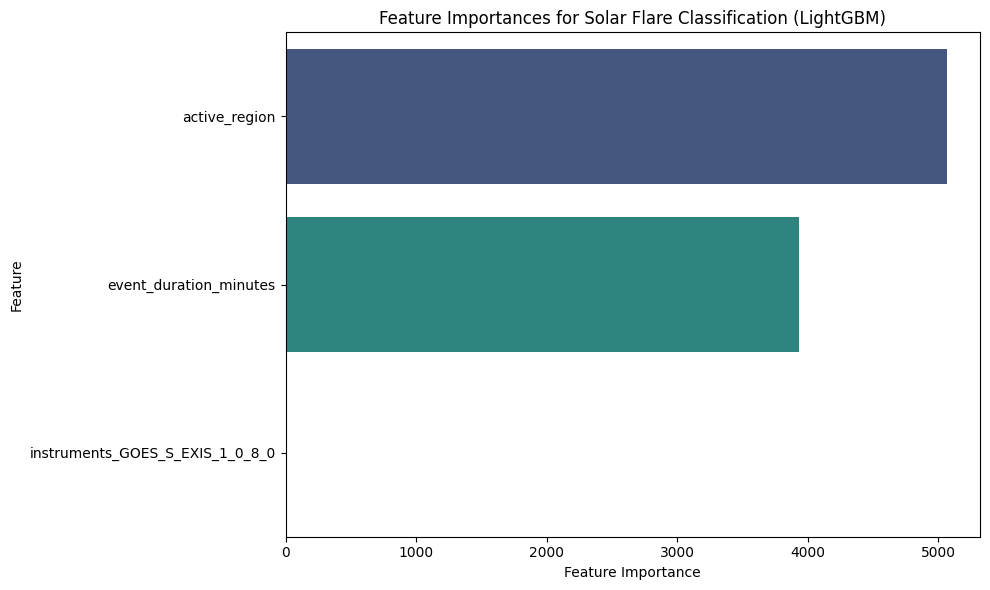


--- Step 5: Feature Importance & Insights Complete ---


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
import lightgbm as lgb
import os
import warnings
import re

warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

print("--- Starting Step 5: Feature Importance & Insights ---")

# --- RE-EXECUTE CORRECTED STEPS 1, 2 & 4 TO ENSURE X_PROCESSED and trained_models are available ---
# This block is self-contained to ensure all necessary variables are correctly defined.

csv_file_path = '/content/solar_flares.csv'
try:
    df_space_weather = pd.read_csv(csv_file_path)
    df_clean = df_space_weather.copy()

    # Step 2.1: Drop Irrelevant & High-Cardinality Columns
    columns_to_drop = [
        'event_id', 'event_type', 'note', 'source_location'
    ]
    df_clean.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # Step 2.2: Convert Datetime Columns and Engineer Features
    datetime_cols = ['begin_time', 'peak_time', 'end_time']
    for col in datetime_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', utc=True)

    if 'begin_time' in df_clean.columns and 'end_time' in df_clean.columns:
        df_clean['event_duration_minutes'] = (df_clean['end_time'] - df_clean['begin_time']).dt.total_seconds() / 60

    # Step 2.3: Handle Remaining Missing Values
    df_clean.dropna(inplace=True)

    # Step 2.4: Encode the Target Variable ('class_type') and Filter Rare Classes
    if 'class_type' in df_clean.columns:
        df_clean['main_class'] = df_clean['class_type'].astype(str).str.extract(r'([A-Z])').iloc[:, 0]
        class_order = ['A', 'B', 'C', 'M', 'X']

        main_class_counts = df_clean['main_class'].value_counts()
        classes_to_keep = main_class_counts[main_class_counts >= 2].index.tolist()
        final_classes_for_encoding = [c for c in class_order if c in classes_to_keep]

        initial_rows_before_class_filter = df_clean.shape[0]
        df_clean = df_clean[df_clean['main_class'].isin(final_classes_for_encoding)].copy()

        oe_class = OrdinalEncoder(categories=[final_classes_for_encoding])
        df_clean['class_type_Encoded'] = oe_class.fit_transform(df_clean[['main_class']])

    # Step 2.5: Separate Features (X) and Target (y)
    y = df_clean['class_type_Encoded'].astype(int)

    features_to_exclude_from_X = [
        'class_type', 'main_class',
        'begin_time', 'peak_time', 'end_time',
        'class_type_Encoded'
    ]
    X = df_clean.drop(columns=features_to_exclude_from_X, errors='ignore')

    # Step 2.6: Identify Numerical and Categorical Features for X
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Step 2.7: Apply One-Hot Encoding to remaining Categorical Features (for X)
    df_encoded_cats = pd.DataFrame(index=X.index)
    if categorical_features:
        categorical_features_to_ohe = categorical_features
        df_encoded_cats = pd.get_dummies(X[categorical_features_to_ohe], columns=categorical_features_to_ohe, drop_first=True, dtype=int)

    # Step 2.8: Feature Scaling (for numerical features in X)
    numerical_features_after_cat_handling = X.select_dtypes(include=np.number).columns.tolist()
    df_scaled_nums = pd.DataFrame(index=X.index)
    if numerical_features_after_cat_handling:
        scaler = StandardScaler()
        df_scaled_nums = pd.DataFrame(scaler.fit_transform(X[numerical_features_after_cat_handling]), columns=numerical_features_after_cat_handling, index=X.index)

    # Step 2.9: Combine all Processed Features (X)
    X_processed = pd.concat([df_scaled_nums, df_encoded_cats], axis=1)

    X_processed.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_processed.columns]
    X_processed.columns = [re.sub(r'_{2,}', '_', col) for col in X_processed.columns]
    X_processed.columns = [col.strip('_') for col in X_processed.columns]

    # Step 4.1: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

    # Step 4.2 & 4.3: Model Selection & Training (Train LightGBM again for importance extraction)
    lgbm_model = lgb.LGBMClassifier(random_state=42)
    lgbm_model.fit(X_train, y_train)
    print("LightGBM Classifier re-trained for Feature Importance.")

except FileNotFoundError:
    print(f"ERROR: Dataset not found at '{csv_file_path}'. Please check the path and upload status.")
    exit()
except Exception as e:
    print(f"ERROR: An error occurred during the re-execution of preceding steps for Step 5: {e}")
    print("Please ensure your dataset is correctly formatted and all columns expected by the code exist.")
    exit()


# --- Step 5: Feature Importance & Insights ---
print("\n--- Extracting Feature Importances from LightGBM Classifier ---")

# Get feature importances from the trained LightGBM model
feature_importances = lgbm_model.feature_importances_

# Get the feature names from X_processed.columns
feature_names = X_processed.columns.tolist()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances for Solar Flare Classification (LightGBM):")
# Print all features, as there are only 3, not just top 20
print(importance_df)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances for Solar Flare Classification (LightGBM)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Step 5: Feature Importance & Insights Complete ---")

**Exporting Data for Power BI / Tableau**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
import lightgbm as lgb
import os
import warnings
import re # For cleaning feature names

warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

print("--- Starting Step 6.1: Exporting Data for Power BI / Tableau ---")

# --- RE-EXECUTE CORRECTED STEPS 1, 2, 4 & 5 TO ENSURE ALL VARIABLES ARE AVAILABLE ---
# This ensures X_processed, y, predictions, importance_df, and oe_class are defined.

csv_file_path = '/content/solar_flares.csv'
try:
    df_space_weather = pd.read_csv(csv_file_path)
    df_clean = df_space_weather.copy()

    # Step 2.1: Drop Irrelevant & High-Cardinality Columns
    columns_to_drop = [
        'event_id', 'event_type', 'note', 'source_location'
    ]
    df_clean.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # Step 2.2: Convert Datetime Columns and Engineer Features
    datetime_cols = ['begin_time', 'peak_time', 'end_time']
    for col in datetime_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce', utc=True)

    if 'begin_time' in df_clean.columns and 'end_time' in df_clean.columns:
        df_clean['event_duration_minutes'] = (df_clean['end_time'] - df_clean['begin_time']).dt.total_seconds() / 60

    # Step 2.3: Handle Remaining Missing Values
    df_clean.dropna(inplace=True)

    # Step 2.4: Encode the Target Variable ('class_type') and Filter Rare Classes
    if 'class_type' in df_clean.columns:
        df_clean['main_class'] = df_clean['class_type'].astype(str).str.extract(r'([A-Z])').iloc[:, 0]
        class_order = ['A', 'B', 'C', 'M', 'X']

        main_class_counts = df_clean['main_class'].value_counts()
        classes_to_keep = main_class_counts[main_class_counts >= 2].index.tolist()
        final_classes_for_encoding = [c for c in class_order if c in classes_to_keep]

        initial_rows_before_class_filter = df_clean.shape[0]
        df_clean = df_clean[df_clean['main_class'].isin(final_classes_for_encoding)].copy()

        oe_class = OrdinalEncoder(categories=[final_classes_for_encoding]) # Store this for reverse mapping
        df_clean['class_type_Encoded'] = oe_class.fit_transform(df_clean[['main_class']])

    # Step 2.5: Separate Features (X) and Target (y)
    y = df_clean['class_type_Encoded'].astype(int)

    features_to_exclude_from_X = [
        'class_type', 'main_class',
        'begin_time', 'peak_time', 'end_time',
        'class_type_Encoded'
    ]
    X = df_clean.drop(columns=features_to_exclude_from_X, errors='ignore')

    # Step 2.6: Identify Numerical and Categorical Features for X
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Step 2.7: Apply One-Hot Encoding to remaining Categorical Features (for X)
    df_encoded_cats = pd.DataFrame(index=X.index)
    if categorical_features:
        categorical_features_to_ohe = categorical_features
        df_encoded_cats = pd.get_dummies(X[categorical_features_to_ohe], columns=categorical_features_to_ohe, drop_first=True, dtype=int)

    # Step 2.8: Feature Scaling (for numerical features in X)
    numerical_features_after_cat_handling = X.select_dtypes(include=np.number).columns.tolist()
    df_scaled_nums = pd.DataFrame(index=X.index)
    if numerical_features_after_cat_handling:
        scaler = StandardScaler()
        df_scaled_nums = pd.DataFrame(scaler.fit_transform(X[numerical_features_after_cat_handling]), columns=numerical_features_after_cat_handling, index=X.index)

    # Step 2.9: Combine all Processed Features (X)
    X_processed = pd.concat([df_scaled_nums, df_encoded_cats], axis=1)

    X_processed.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_processed.columns]
    X_processed.columns = [re.sub(r'_{2,}', '_', col) for col in X_processed.columns]
    X_processed.columns = [col.strip('_') for col in X_processed.columns]

    # Step 4.1: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

    # Step 4.2 & 4.3: Model Selection & Training (Train LightGBM - Best Model)
    lgbm_model = lgb.LGBMClassifier(random_state=42)
    lgbm_model.fit(X_train, y_train)
    y_pred_lgbm = lgbm_model.predict(X_test) # Get predictions for best model

    # Step 5: Feature Importance Extraction
    feature_importances = lgbm_model.feature_importances_
    feature_names = X_processed.columns.tolist()
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("All preceding steps (Data Prep, Modeling, Feature Importance) re-executed for export.")

except FileNotFoundError:
    print(f"ERROR: Dataset not found at '{csv_file_path}'. Please check the path and upload status.")
    exit()
except Exception as e:
    print(f"ERROR: An error occurred during re-execution of previous steps for export: {e}")
    print("Please ensure your dataset is correctly formatted and all columns expected by the code exist.")
    exit()


# --- Step 6.1: Exporting Data for Power BI / Tableau ---

output_dir = 'powerbi_data_solar_flares'
os.makedirs(output_dir, exist_ok=True) # Create directory if it doesn't exist

# 1. Prepare data for model evaluation dashboard (Actual vs. Predicted)
df_predictions_solar_flares = pd.DataFrame({
    'Actual_Encoded': y_test,
    'Predicted_Encoded': y_pred_lgbm
})

# Map encoded values back to original class labels for Power BI readability
# Use oe_class.categories_[0] which holds the actual class labels in order
class_labels_map = {i: label for i, label in enumerate(oe_class.categories_[0])}
df_predictions_solar_flares['Actual_Class'] = df_predictions_solar_flares['Actual_Encoded'].map(class_labels_map)
df_predictions_solar_flares['Predicted_Class'] = df_predictions_solar_flares['Predicted_Encoded'].map(class_labels_map)

# Add a column to indicate if the prediction was correct
df_predictions_solar_flares['Is_Correct'] = (df_predictions_solar_flares['Actual_Encoded'] == df_predictions_solar_flares['Predicted_Encoded']).astype(int)
df_predictions_solar_flares['Is_Correct_Label'] = df_predictions_solar_flares['Is_Correct'].map({1: 'Correct', 0: 'Incorrect'})

# 2. Export to CSV files
df_predictions_solar_flares.to_csv(f'{output_dir}/solar_flare_predictions.csv', index=False)
importance_df.to_csv(f'{output_dir}/solar_flare_feature_importances.csv', index=False)

print(f"\nData exported to '{output_dir}/solar_flare_predictions.csv' and '{output_dir}/solar_flare_feature_importances.csv'")
print("\n--- Data Export Complete ---")

--- Starting Step 6.1: Exporting Data for Power BI / Tableau ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 1240, number of used features: 2
[LightGBM] [Info] Start training from score -2.247669
[LightGBM] [Info] Start training from score -0.161571
[LightGBM] [Info] Start training from score -3.133883
All preceding steps (Data Prep, Modeling, Feature Importance) re-executed for export.

Data exported to 'powerbi_data_solar_flares/solar_flare_predictions.csv' and 'powerbi_data_solar_flares/solar_flare_feature_importances.csv'

--- Data Export Complete ---
